In [4]:
import pandas as pd
import numpy as np

In [5]:
db = pd.read_csv(r"C:\Users\laksh\NIDS_Prediction\Total_CSVs\NIDS_Dataset.csv")

In [6]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,1,0,0,0,0,0,0,1,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,2,0,0,0,0,0,0,1,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,3,0,0,0,0,0,0,1,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,4,0,0,0,0,0,0,1,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign


In [7]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [8]:
db = db.iloc[:,1:46]
db = db.iloc[:,0:45]
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [9]:
x1 = db.iloc[:,0:45]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [10]:
x1 = db.iloc[:,0:44]
y1 = db.iloc[:,44]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,...,1.562871,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178
1,0,0,0,0,0,0,1,0,0,0,...,-2.909475,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056
2,0,0,0,0,0,0,1,0,0,0,...,-0.381118,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369
3,0,0,0,0,0,0,1,0,0,0,...,0.617898,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256
4,0,0,0,0,0,0,1,0,0,0,...,0.428250,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,-0.616616,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881
269639,1,0,0,0,0,0,0,0,0,0,...,1.499615,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549
269640,1,0,0,0,0,0,0,0,0,0,...,-0.889490,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937
269641,1,0,0,0,0,0,0,0,0,0,...,-0.665595,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511


In [11]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [12]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [13]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [14]:
c_class_0, c_class_1 = db.Benign.value_counts()
c_class_0, c_class_1 = db.Benign.value_counts()

In [15]:
print(c_class_0)
print(c_class_1)

249836
19807


In [16]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [17]:
df_c_0_under = df_c_0.sample(c_class_1)

In [18]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [19]:
print(df_under.Benign.value_counts())

Malicious    19807
Benign       19807
Name: Benign, dtype: int64


In [20]:
df_Totoal = df_under

In [21]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
26391,0,0,0,0,0,1,0,0,0,0,...,-0.922341,-0.178944,-0.246456,-0.238647,-0.221612,-0.153059,-0.029541,-0.622244,-0.485784,Malicious
187153,0,1,0,0,0,0,0,0,1,0,...,-1.164088,-0.178933,-0.241280,-0.239908,-0.222840,-0.159624,0.185353,0.176689,-0.176955,Malicious
109255,0,1,0,0,0,0,0,0,1,0,...,1.078711,-0.178938,-0.243293,-0.240166,-0.221611,-0.159622,-0.704170,0.319066,-0.255230,Malicious
126513,0,0,0,0,0,0,1,0,0,0,...,0.885794,-0.178940,-0.243981,-0.240072,-0.221607,-0.159624,-0.755674,0.433763,-0.300857,Malicious
93289,0,0,1,0,0,0,0,0,1,0,...,-0.885123,-0.152154,0.148309,-0.093980,-0.226445,-0.159625,1.599991,0.062336,-0.084832,Malicious


In [22]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [23]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [25]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [26]:
x_train.shape

(31691, 44)

In [27]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="RMSprop",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=65,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/65
446/446 [==============================] - 3s 5ms/step - loss: 0.2054 - accuracy: 0.9249
Epoch 2/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1537 - accuracy: 0.9438
Epoch 3/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1521 - accuracy: 0.9437
Epoch 4/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1498 - accuracy: 0.9440
Epoch 5/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1478 - accuracy: 0.9451
Epoch 6/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9446
Epoch 7/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1466 - accuracy: 0.9446
Epoch 8/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9448
Epoch 9/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1461 - accuracy: 0.9454
Epoch 10/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1453 - accuracy: 0.9452

446/446 [==============================] - 4s 9ms/step - loss: 0.1442 - accuracy: 0.9462
Epoch 16/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1451 - accuracy: 0.9456
Epoch 17/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1441 - accuracy: 0.9470
Epoch 18/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1446 - accuracy: 0.9459
Epoch 19/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1438 - accuracy: 0.9465
Epoch 20/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1446 - accuracy: 0.9457
Epoch 21/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1443 - accuracy: 0.9454
Epoch 22/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1430 - accuracy: 0.9454
Epoch 23/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1446 - accuracy: 0.9451
Epoch 24/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1436 - accuracy: 0.9458
Ep

446/446 [==============================] - 3s 6ms/step - loss: 0.1414 - accuracy: 0.9472
Epoch 30/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1420 - accuracy: 0.9469
Epoch 31/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1420 - accuracy: 0.9468
Epoch 32/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1420 - accuracy: 0.9464
Epoch 33/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1428 - accuracy: 0.9468
Epoch 34/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1419 - accuracy: 0.9465
Epoch 35/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1416 - accuracy: 0.9474
Epoch 36/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1432 - accuracy: 0.9464
Epoch 37/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1423 - accuracy: 0.9463
Epoch 38/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1432 - accuracy: 0.9473
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1433 - accuracy: 0.9461
Epoch 44/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1434 - accuracy: 0.9466
Epoch 45/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1436 - accuracy: 0.9473
Epoch 46/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1435 - accuracy: 0.9457
Epoch 47/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1435 - accuracy: 0.9463
Epoch 48/65
446/446 [==============================] - 2s 6ms/step - loss: 0.1440 - accuracy: 0.9446
Epoch 49/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1446 - accuracy: 0.9448
Epoch 50/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1439 - accuracy: 0.9455
Epoch 51/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1437 - accuracy: 0.9453
Epoch 52/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1429 - accuracy: 0.9459
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1458 - accuracy: 0.9452
Epoch 58/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1461 - accuracy: 0.9447
Epoch 59/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1466 - accuracy: 0.9450
Epoch 60/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1454 - accuracy: 0.9451
Epoch 61/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9451
Epoch 62/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1458 - accuracy: 0.9444
Epoch 63/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1455 - accuracy: 0.9446
Epoch 64/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1460 - accuracy: 0.9450
Epoch 65/65
100/100 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9508
4th Fold :
accuracy: 95.08%
------------------------------------------------------------------
Epoch 1/

446/446 [==============================] - 2s 4ms/step - loss: 0.1496 - accuracy: 0.9458
Epoch 5/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1486 - accuracy: 0.9457
Epoch 6/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1483 - accuracy: 0.9448
Epoch 7/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1475 - accuracy: 0.9444
Epoch 8/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1465 - accuracy: 0.9453
Epoch 9/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1466 - accuracy: 0.9458
Epoch 10/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1457 - accuracy: 0.9451
Epoch 11/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1461 - accuracy: 0.9455
Epoch 12/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1466 - accuracy: 0.9455
Epoch 13/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1450 - accuracy: 0.9470
Epoch 1

446/446 [==============================] - 2s 4ms/step - loss: 0.1451 - accuracy: 0.9463
Epoch 19/65
446/446 [==============================] - 2s 5ms/step - loss: 0.1442 - accuracy: 0.9461
Epoch 20/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9455
Epoch 21/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1438 - accuracy: 0.9460
Epoch 22/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1431 - accuracy: 0.9459
Epoch 23/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1450 - accuracy: 0.9453
Epoch 24/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9460
Epoch 25/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9454
Epoch 26/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1430 - accuracy: 0.9459
Epoch 27/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9466
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1443 - accuracy: 0.9456
Epoch 33/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1443 - accuracy: 0.9452
Epoch 34/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1441 - accuracy: 0.9454
Epoch 35/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1442 - accuracy: 0.9463
Epoch 36/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1442 - accuracy: 0.9453
Epoch 37/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1432 - accuracy: 0.9467
Epoch 38/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1448 - accuracy: 0.9460
Epoch 39/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1436 - accuracy: 0.9451
Epoch 40/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9453
Epoch 41/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1451 - accuracy: 0.9451
Ep

446/446 [==============================] - 2s 4ms/step - loss: 0.1457 - accuracy: 0.9454
Epoch 47/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1454 - accuracy: 0.9452
Epoch 48/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1445 - accuracy: 0.9459
Epoch 49/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1452 - accuracy: 0.9460
Epoch 50/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1453 - accuracy: 0.9456
Epoch 51/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9465
Epoch 52/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1441 - accuracy: 0.9457
Epoch 53/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1454 - accuracy: 0.9450
Epoch 54/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9461
Epoch 55/65
446/446 [==============================] - 2s 4ms/step - loss: 0.1443 - accuracy: 0.9462
Ep

In [28]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [29]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [30]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [31]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9472


In [32]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.6735680103302
Test accuracy: 94.72422003746033


In [34]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

248/248 [==============================] - 0s 962us/step


In [35]:
y_pred = pd.get_dummies(y_classes)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3926
           1       0.96      0.94      0.95      3997

   micro avg       0.95      0.95      0.95      7923
   macro avg       0.95      0.95      0.95      7923
weighted avg       0.95      0.95      0.95      7923
 samples avg       0.95      0.95      0.95      7923



In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
y_test_le = le.fit_transform(y_test)

In [39]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [40]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [41]:
from matplotlib import pyplot

In [42]:
print(auc_keras)

0.947342033524634


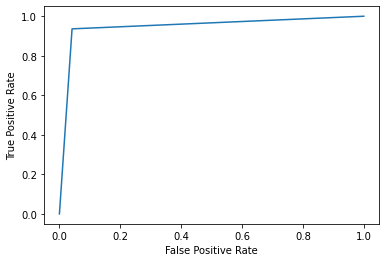

In [43]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()